In [104]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
import pyodbc
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=unagisqlserver.database.windows.net;'
    r'DATABASE=unagi;'
    r'UID=Dhanush;'
    r'PWD=Dan@123#;'
)
location="Ampara"
cnxn=pyodbc.connect(conn_str)
cursor=cnxn.cursor()
cursor.execute("SELECT Date,Temperature FROM dbo.{}".format(location))
output=[]
while 1:
    row=cursor.fetchone()
    if not row:
        break
    output.append(row.Date)
    output.append(row.Temperature)
length=len(output)
f=open("{}temp.csv".format(location),"w")
f.write("Date,Temperature")
f.write("\n")
i=0
while i<length:
    f.write("{},{}".format(output[i],output[i+1]))
    f.write("\n")
    i=i+2
f.close()
cnxn.close()

def parser(x):
    return datetime.strptime(x,'%m/%Y')

df = pd.read_csv('C:/Users/User/Desktop/python/AmparaAll.csv',parse_dates=[0],date_parser=parser)

In [105]:
df = df.set_index('Date')

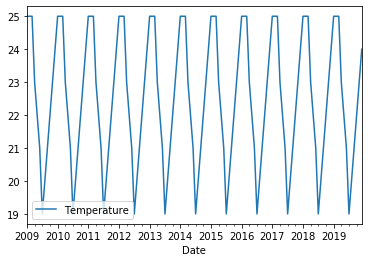

In [106]:
df.plot()

In [107]:
df.size

132

In [108]:
train, test = df[:50], df[50:]

In [109]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [110]:
n_input = 24
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)

In [111]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [112]:
model.fit_generator(generator,epochs=180)

Epoch 1/180
3/3 [==============================] - 0s 110ms/step - loss: 0.5028
Epoch 2/180
3/3 [==============================] - 0s 23ms/step - loss: 0.3992
Epoch 3/180
3/3 [==============================] - 0s 17ms/step - loss: 0.2514
Epoch 4/180
3/3 [==============================] - 0s 26ms/step - loss: 0.1836
Epoch 5/180
3/3 [==============================] - 0s 17ms/step - loss: 0.1474
Epoch 6/180
3/3 [==============================] - 0s 26ms/step - loss: 0.1208
Epoch 7/180
3/3 [==============================] - 0s 17ms/step - loss: 0.1583
Epoch 8/180
3/3 [==============================] - 0s 25ms/step - loss: 0.1688
Epoch 9/180
3/3 [==============================] - 0s 19ms/step - loss: 0.1495
Epoch 10/180
3/3 [==============================] - 0s 21ms/step - loss: 0.1118
Epoch 11/180
3/3 [==============================] - 0s 25ms/step - loss: 0.1294
Epoch 12/180
3/3 [==============================] - 0s 19ms/step - loss: 0.1897
Epoch 13/180
3/3 [==============================

3/3 [==============================] - 0s 34ms/step - loss: 0.0195
Epoch 104/180
3/3 [==============================] - 0s 15ms/step - loss: 0.0158
Epoch 105/180
3/3 [==============================] - 0s 26ms/step - loss: 0.0140
Epoch 106/180
3/3 [==============================] - 0s 26ms/step - loss: 0.0170
Epoch 107/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0143
Epoch 108/180
3/3 [==============================] - 0s 29ms/step - loss: 0.0113
Epoch 109/180
3/3 [==============================] - 0s 16ms/step - loss: 0.0166
Epoch 110/180
3/3 [==============================] - 0s 26ms/step - loss: 0.0148
Epoch 111/180
3/3 [==============================] - 0s 26ms/step - loss: 0.0192
Epoch 112/180
3/3 [==============================] - 0s 25ms/step - loss: 0.0162
Epoch 113/180
3/3 [==============================] - 0s 18ms/step - loss: 0.0138
Epoch 114/180
3/3 [==============================] - 0s 27ms/step - loss: 0.0148
Epoch 115/180
3/3 [=======================

In [113]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [114]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


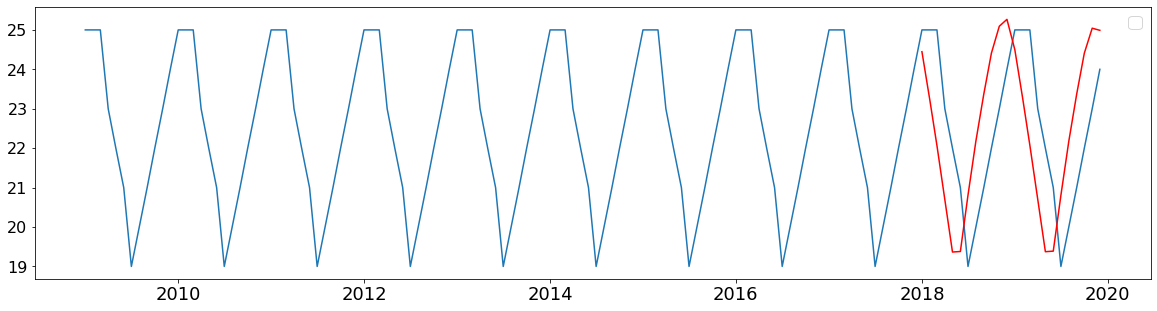

In [115]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Temperature'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [116]:
df.tail()

,Temperature
Date,
2019-08-01,20
2019-09-01,21
2019-10-01,22
2019-11-01,23
2019-12-01,24


In [117]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [2.07804913]


In [118]:
train = df

In [119]:
scaler.fit(train)
train = scaler.transform(train)

In [120]:
n_input = 24
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [121]:
model.fit_generator(generator,epochs=180)

Epoch 1/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0044
Epoch 2/180
18/18 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 3/180
18/18 [==============================] - 0s 14ms/step - loss: 0.0044
Epoch 4/180
18/18 [==============================] - 0s 17ms/step - loss: 0.0046
Epoch 5/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0038
Epoch 6/180
18/18 [==============================] - 0s 14ms/step - loss: 0.0047
Epoch 7/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0031
Epoch 8/180
18/18 [==============================] - 0s 14ms/step - loss: 0.0042
Epoch 9/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0036
Epoch 10/180
18/18 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 11/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 12/180
18/18 [==============================] - 0s 15ms/step - loss: 0.0029
Epoch 13/180
18/18 [=====

18/18 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 101/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 102/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 103/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0020
Epoch 104/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 105/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0022
Epoch 106/180
18/18 [==============================] - 0s 17ms/step - loss: 0.0013
Epoch 107/180
18/18 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 108/180
18/18 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 109/180
18/18 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 110/180
18/18 [==============================] - 0s 17ms/step - loss: 0.0027
Epoch 111/180
18/18 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 112/180
18/1

In [122]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [123]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,25) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
df.tail()

,Temperature
Date,
2019-08-01,20
2019-09-01,21
2019-10-01,22
2019-11-01,23
2019-12-01,24


In [124]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


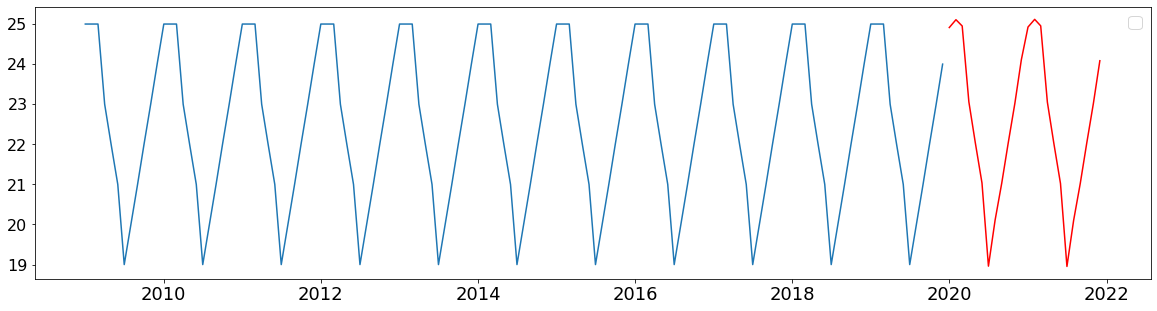

In [125]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Temperature'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [126]:
df_proj.tail(34)

,Temperature,Prediction
2019-03-01,25.0,NaN
2019-04-01,23.0,NaN
2019-05-01,22.0,NaN
2019-06-01,21.0,NaN
2019-07-01,19.0,NaN
2019-08-01,20.0,NaN
2019-09-01,21.0,NaN
2019-10-01,22.0,NaN
2019-11-01,23.0,NaN
2019-12-01,24.0,NaN
